In [1]:
# === PHASE 2: MACHINE LEARNING - PRICE TREND PREDICTION ===
# 📈 Goal: Predict if TSLA stock price will go up or down based on previous day's closing price
# 🧠 Skills Practiced: Feature engineering, ML modeling, classification
# 🎯 Learning Goals: Apply ML to real-world time series data, evaluate model performance

# === 1. IMPORT LIBRARIES ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 2. LOAD DATA ===
# 📦 Load the CSV from previous phase
file_path = "TSLA_stock_data.csv"
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')


In [2]:
# === 3. CREATE LABEL COLUMN ===
# 🏷️ Label each day as 1 if the price went UP the next day, 0 if it went DOWN or stayed
# This is our 'target' for classification
# We'll shift the 'close' column by -1 to compare it to the previous day's price
df['tomorrow_close'] = df['close'].shift(-1)
df['target'] = (df['tomorrow_close'] > df['close']).astype(int)


In [3]:
# === 4. FEATURE SELECTION ===
# 🧠 We'll use 'close' and 'volume' to keep it simple
features = df[['close', 'volume']]
labels = df['target']

In [4]:
# === 5. DROP MISSING VALUES FROM SHIFT ===
df = df.dropna()
features = features.loc[df.index]
labels = labels.loc[df.index]

In [5]:
# === 6. TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
# === 7. TRAIN THE MODEL ===
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# === 8. PREDICT AND EVALUATE ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")


✅ Model Accuracy: 0.55


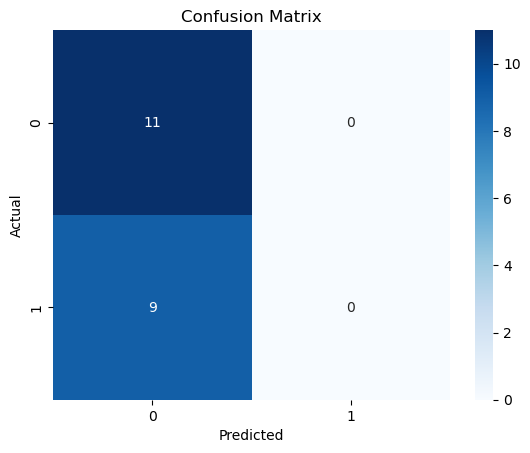

In [8]:
# === 9. CONFUSION MATRIX VISUALIZATION ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 🧠 What You Just Achieved (Reinforced):
# ✅ Engineered a new classification target using time series logic
# ✅ Selected useful features for ML input
# ✅ Trained and evaluated a Logistic Regression model
# ✅ Measured accuracy and visualized prediction errors
# ✅ Practiced end-to-end ML on stock price data